# Heart disease risk prediction with Linear & Tree based models

## The problem
Heart disease risk can be linked to a combination of various elements, including medical conditions, personal habits, age, and familial background. The development of a binary classification model utilizing data from patients pertaining to these factors could prove invaluable in aiding healthcare professionals with diagnostic processes.

## The data
A [streamlined version](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) of the [CDC](https://www.cdc.gov/) version of the CDC dataset, last updated in February 2022, has been utilized to develop a classification model. 
This model is geared towards assessing the risk of heart disease and has been created by narrowing down the initial dataset,
which contained 300 variables, to a more concise set of 20 key indicators.

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sweetviz as sv
from sklearn.metrics import mutual_info_score
import sys

# importing user defined funtions
#sys.path.append("../scripts")
from udfs import (
    dataset_dimensions, 
    rename_columns,
    column_missing_values, 
    column_unique_values, 
)

## Exploratory Data Analysis(EDA)

In [2]:
df = pd.read_csv('data/heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# convert column names from CamelCase to snake_case
rename_columns(df)
df.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# convert columns values to lowercase
for column in df.columns:
    if df[column].dtype == object:  # Check for 'object' dtype (strings)
        df[column] = df[column].str.lower()

In [6]:
df.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,no,16.60,yes,no,no,3.0,30.0,no,female,55-59,white,yes,yes,very good,5.0,yes,no,yes
1,no,20.34,no,no,yes,0.0,0.0,no,female,80 or older,white,no,yes,very good,7.0,no,no,no
2,no,26.58,yes,no,no,20.0,30.0,no,male,65-69,white,yes,yes,fair,8.0,yes,no,no
3,no,24.21,no,no,no,0.0,0.0,no,female,75-79,white,no,no,good,6.0,no,no,yes
4,no,23.71,no,no,no,28.0,0.0,yes,female,40-44,white,no,yes,very good,8.0,no,no,no


In [7]:
# looking for missing values in columns
column_missing_values(df)

No missing values found!


In [8]:
# number of unique values in each column
column_unique_values(df)

Unique values in each column:
           heart_disease: 2
                   b_m_i: 3604
                 smoking: 2
        alcohol_drinking: 2
                  stroke: 2
         physical_health: 31
           mental_health: 31
            diff_walking: 2
                     sex: 2
            age_category: 13
                    race: 6
                diabetic: 4
       physical_activity: 2
              gen_health: 5
              sleep_time: 24
                  asthma: 2
          kidney_disease: 2
             skin_cancer: 2


In [9]:
dataset_dimensions(df)

Dimensions of the dataset:
 Number of rows:    319795
 Number of columns: 18



In [10]:
# dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   heart_disease      319795 non-null  object 
 1   b_m_i              319795 non-null  float64
 2   smoking            319795 non-null  object 
 3   alcohol_drinking   319795 non-null  object 
 4   stroke             319795 non-null  object 
 5   physical_health    319795 non-null  float64
 6   mental_health      319795 non-null  float64
 7   diff_walking       319795 non-null  object 
 8   sex                319795 non-null  object 
 9   age_category       319795 non-null  object 
 10  race               319795 non-null  object 
 11  diabetic           319795 non-null  object 
 12  physical_activity  319795 non-null  object 
 13  gen_health         319795 non-null  object 
 14  sleep_time         319795 non-null  float64
 15  asthma             319795 non-null  object 
 16  ki

In [11]:
# descriptive statistics for numeric variables
df.describe()

,b_m_i,physical_health,mental_health,sleep_time
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


A faster way to perform Exploratory Data Analysis (EDA) is by using the Sweetviz library, designed for pandas DataFrames. Sweetviz creates HTML reports with visualizations for quick viewing in a web browser or integration into notebooks. It also provides insights into the relationships between the target and explanatory variables the blue line in the plots) and the correlations/associations in one plot, simplifying the EDA process.

                                             |                                                                …


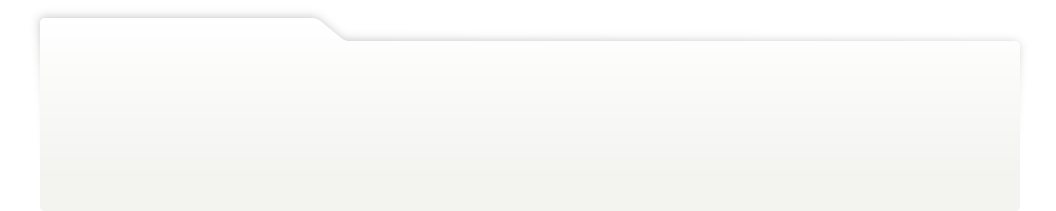
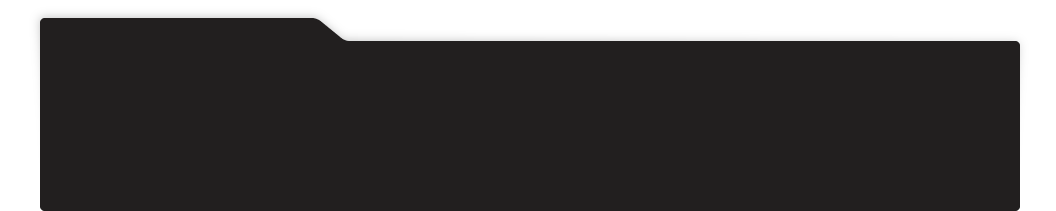
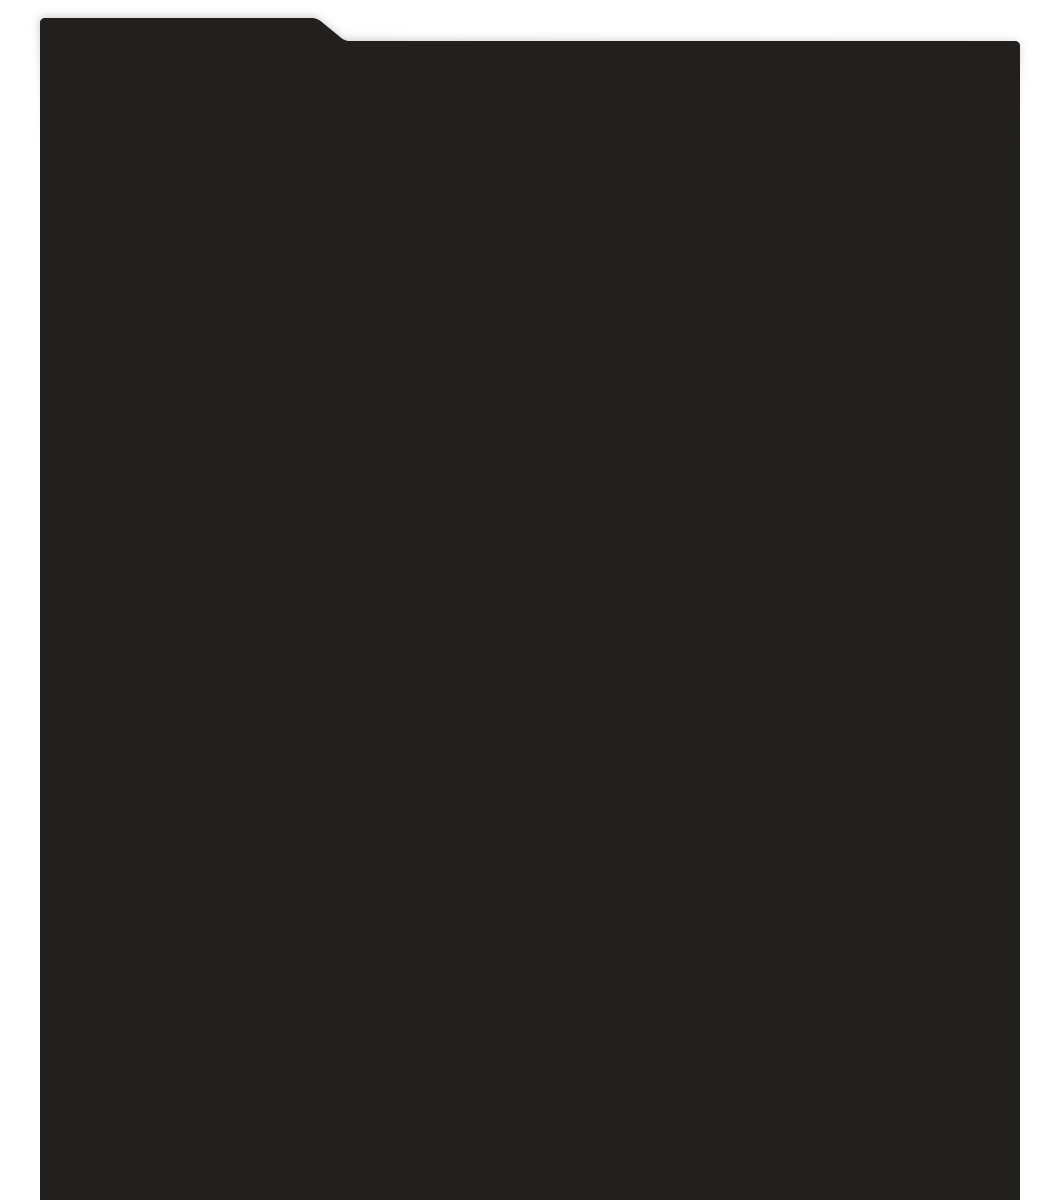
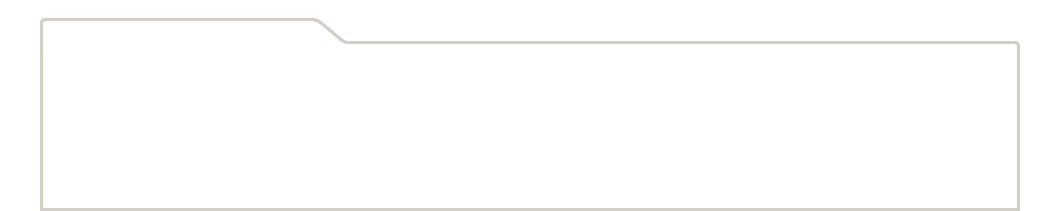
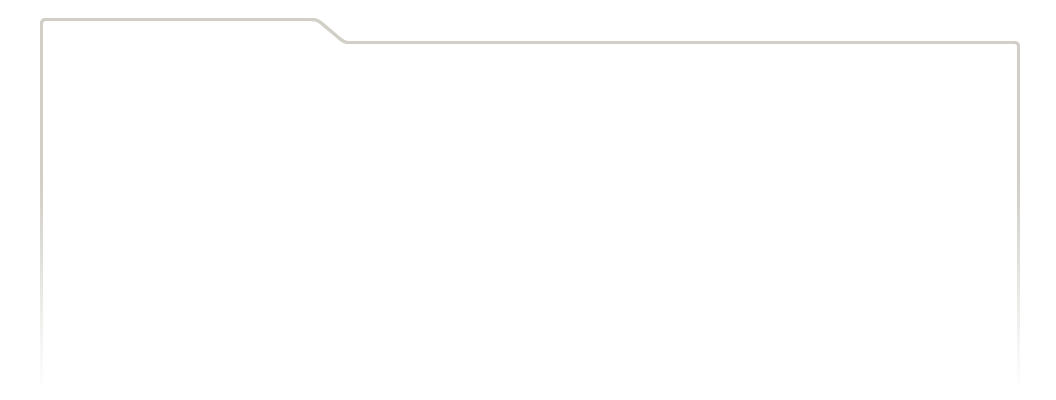
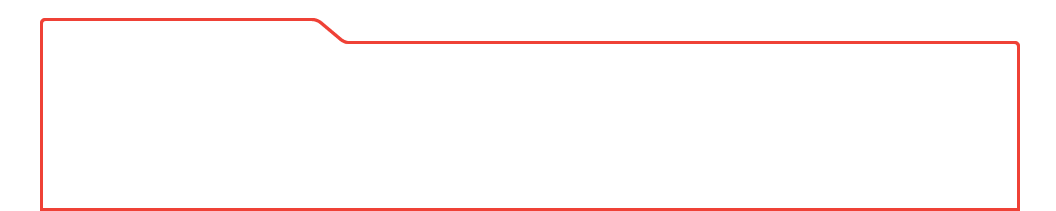
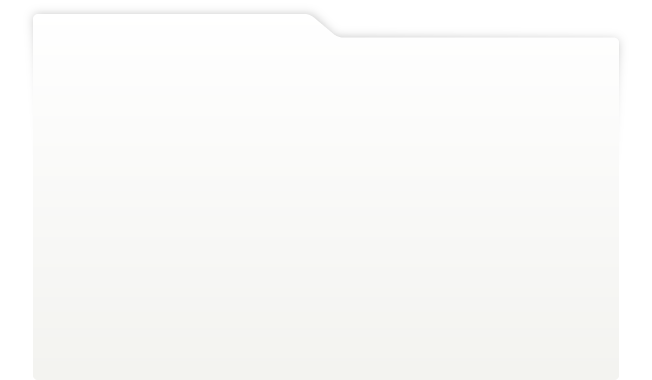
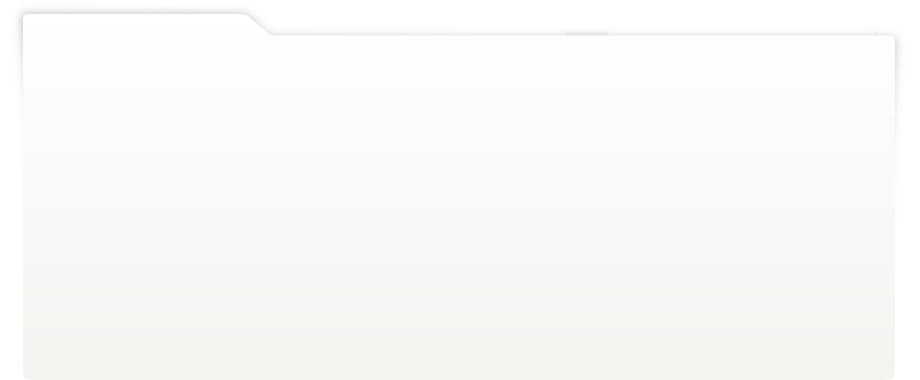
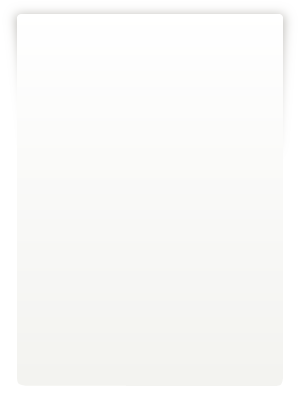
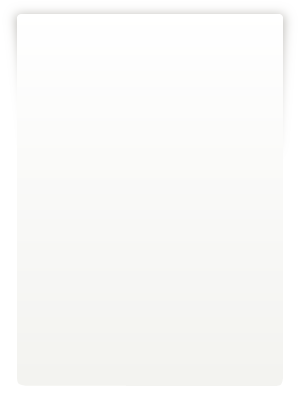
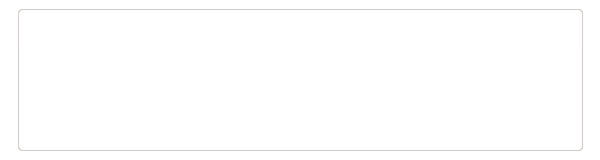
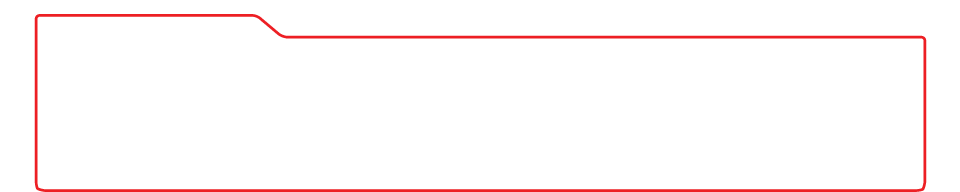
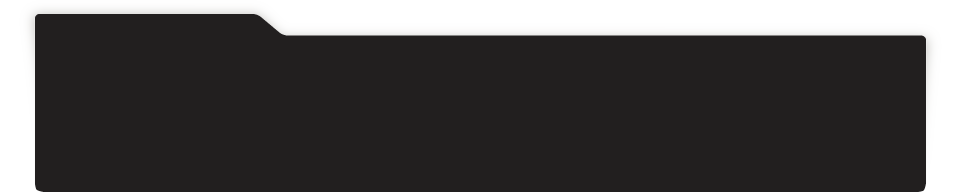
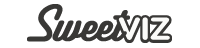
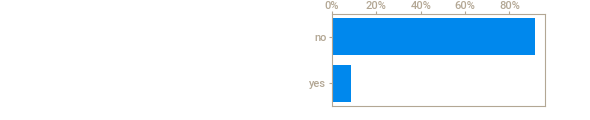
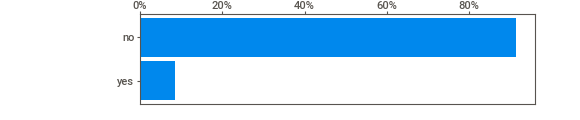
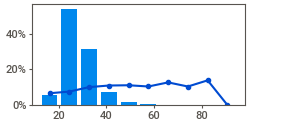
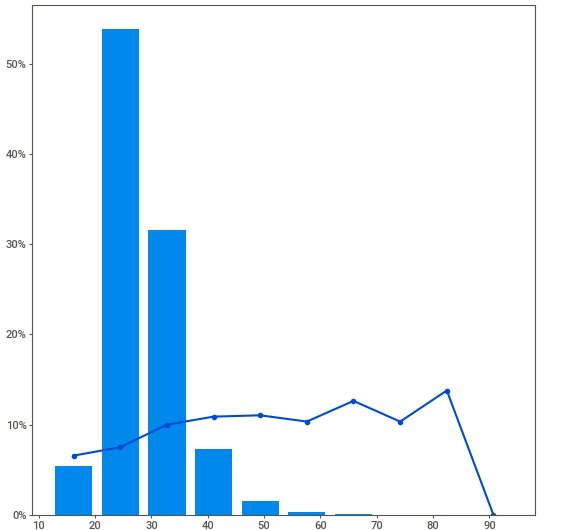
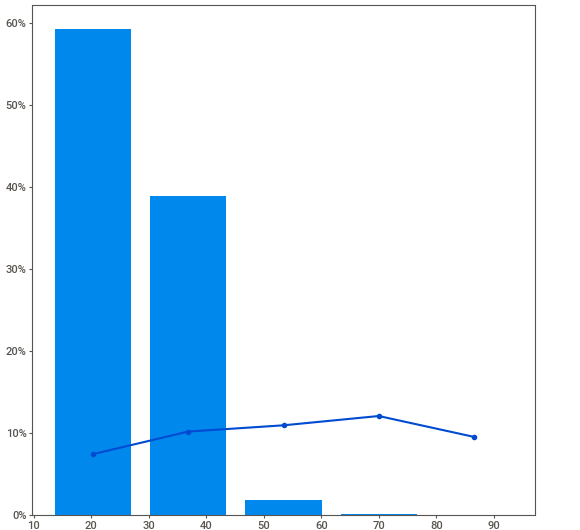
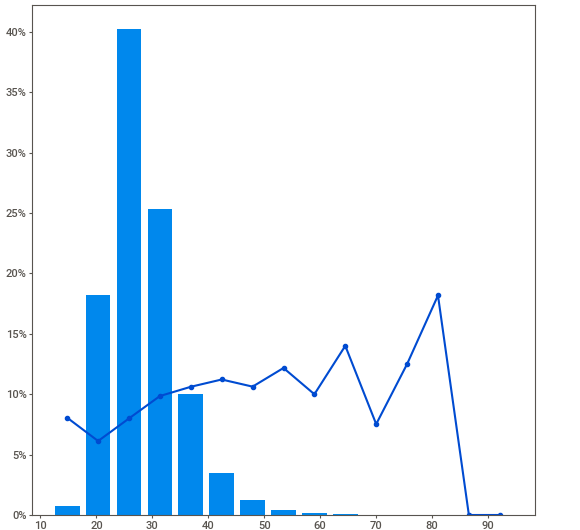
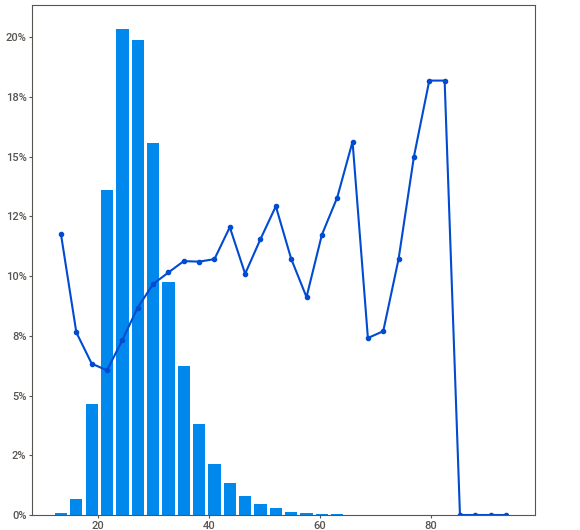
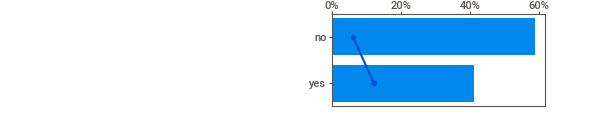
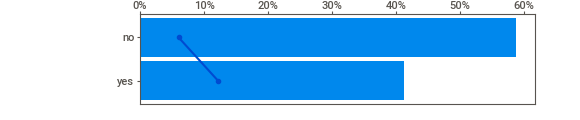
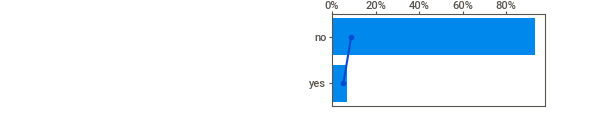
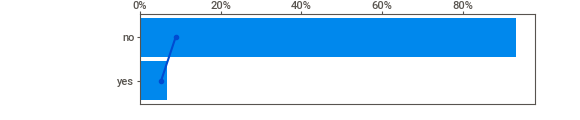
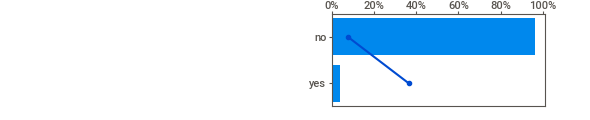
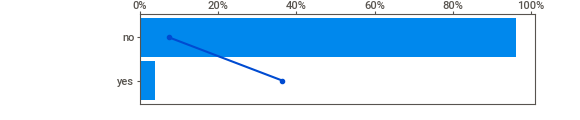
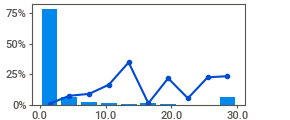
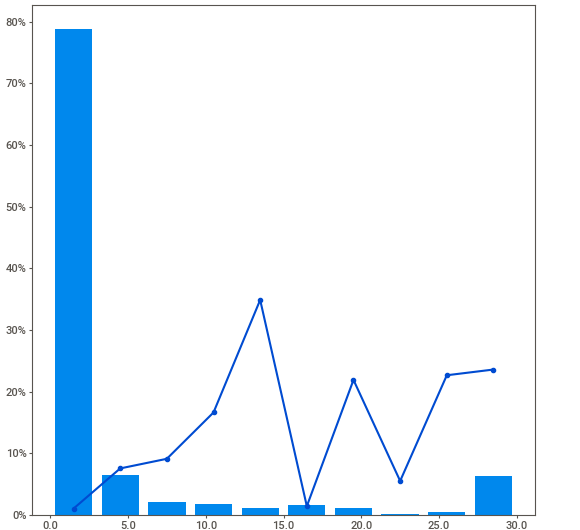
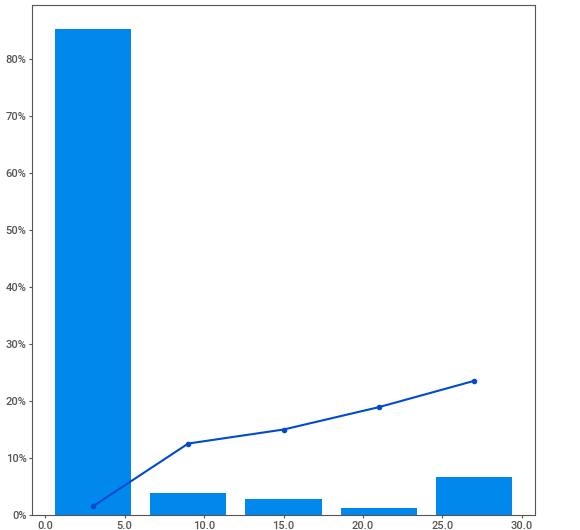
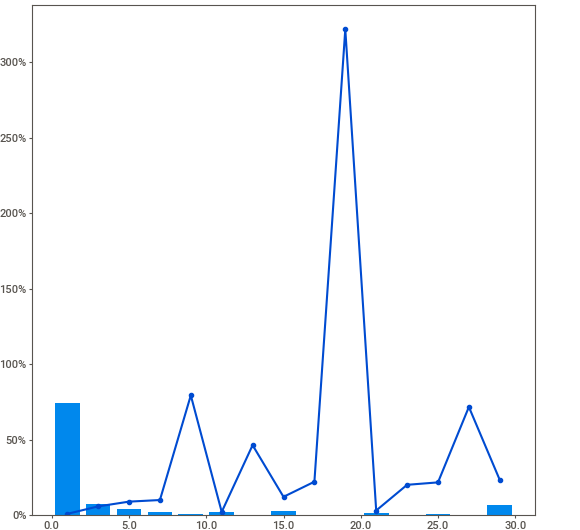
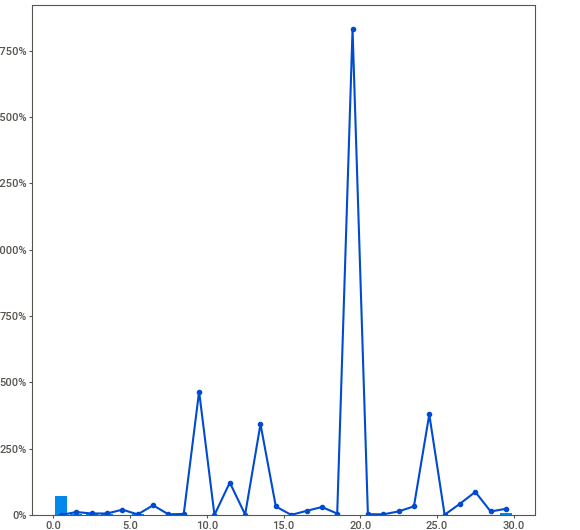
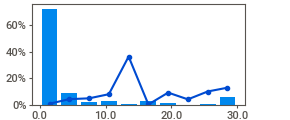
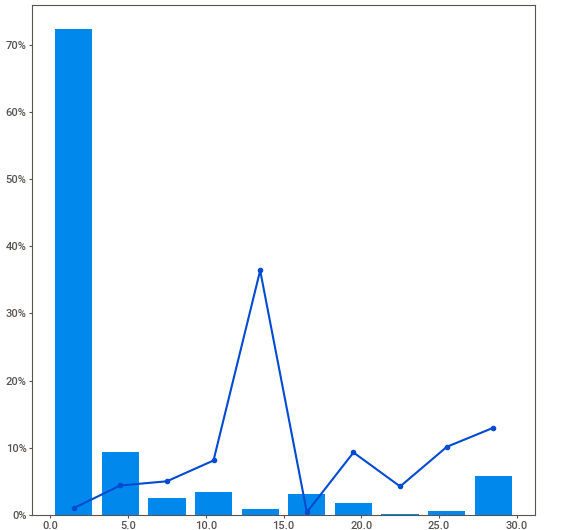
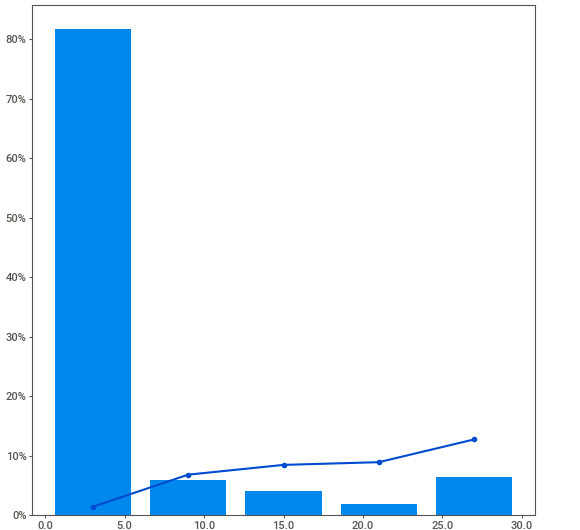
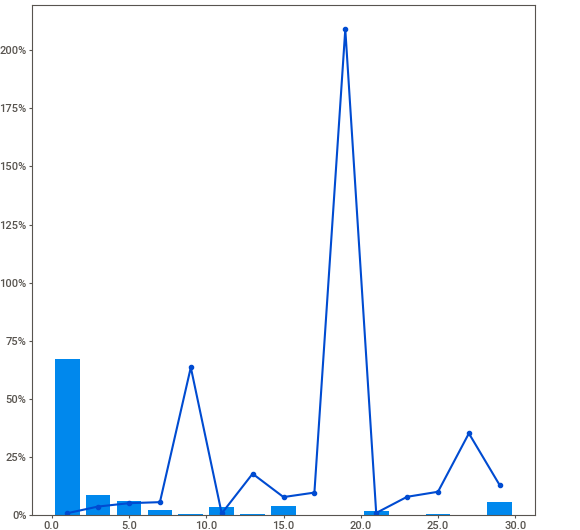
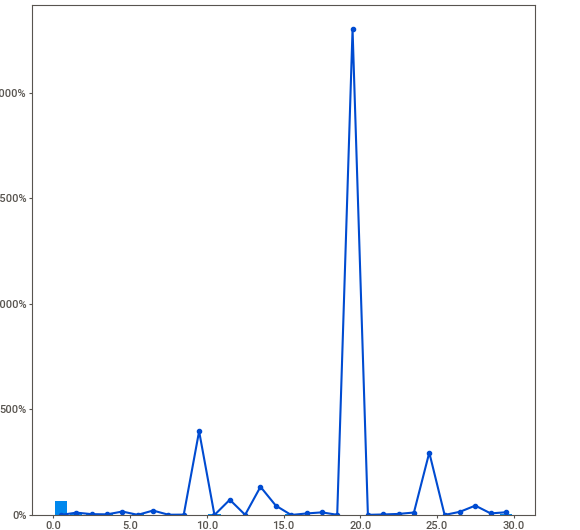
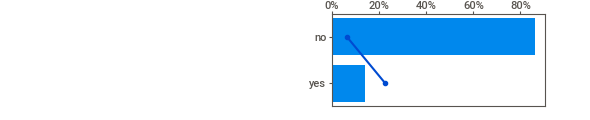
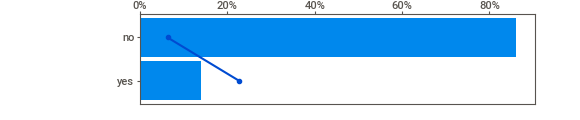
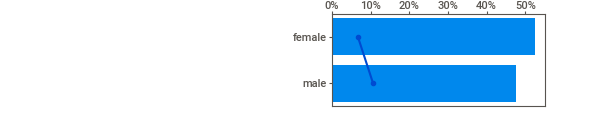
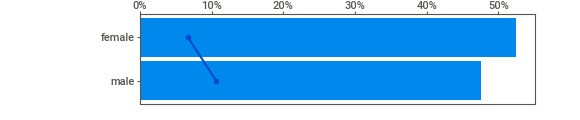
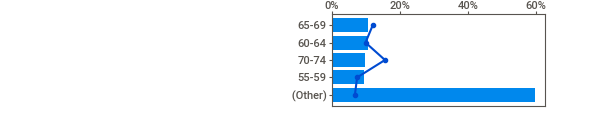
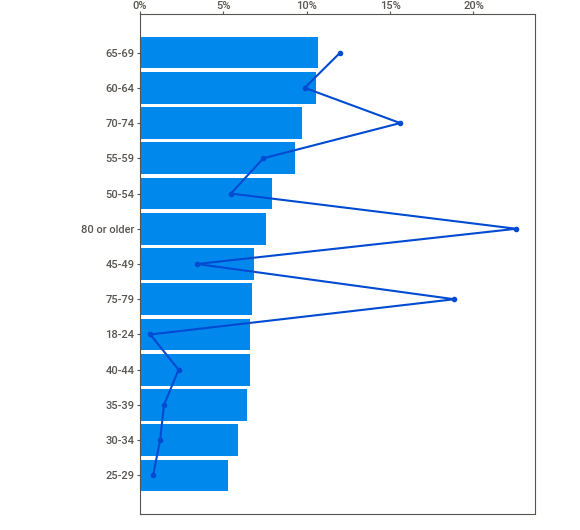
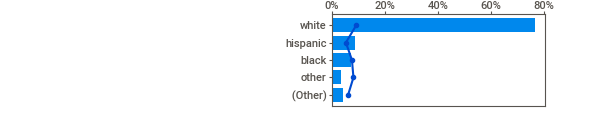
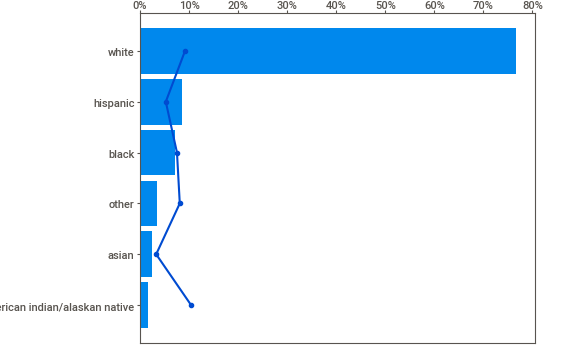
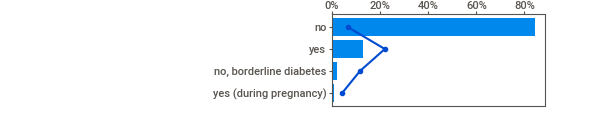
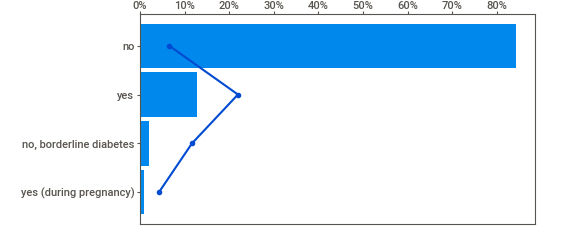
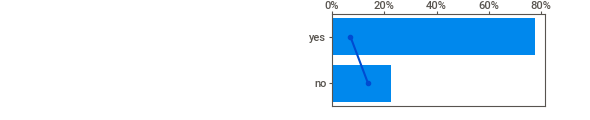
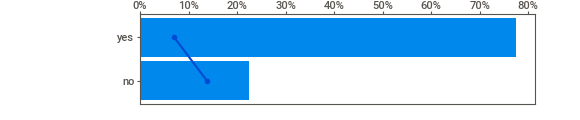
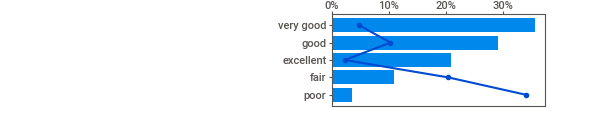
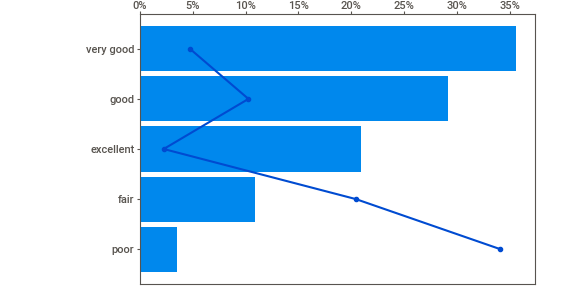
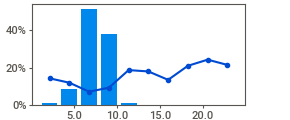
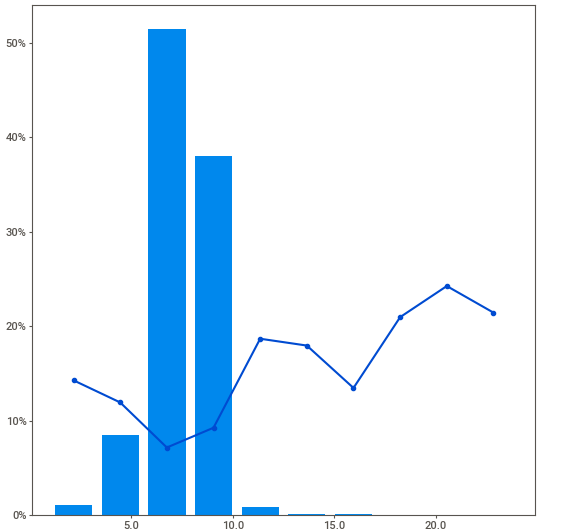
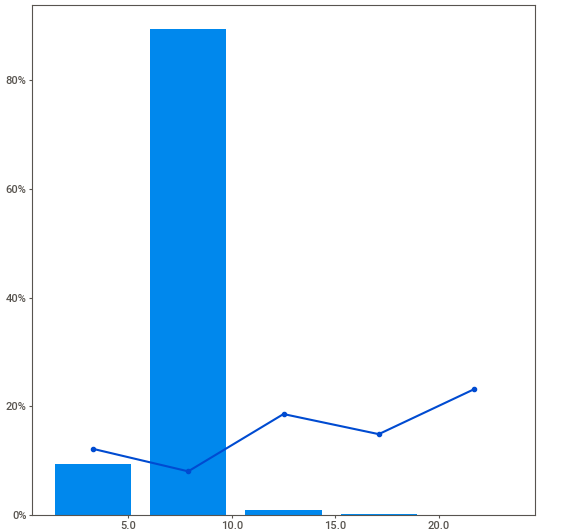
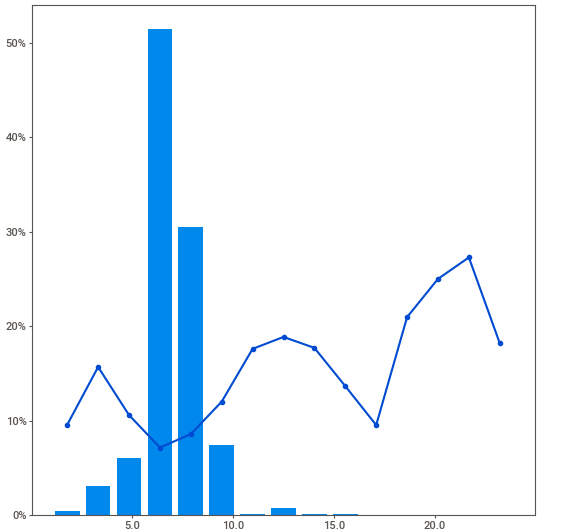
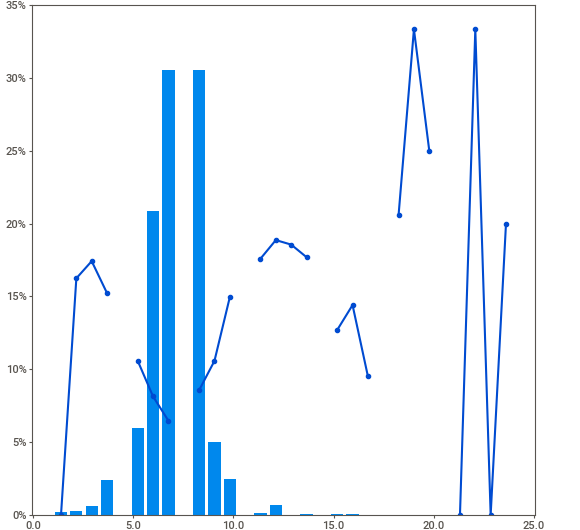
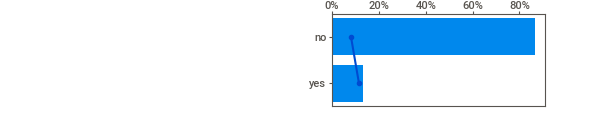
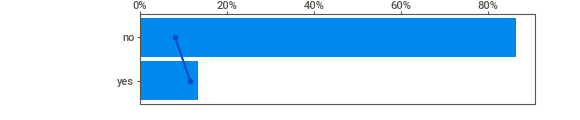
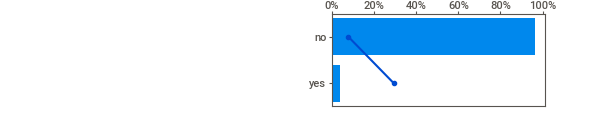
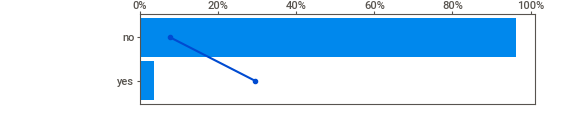
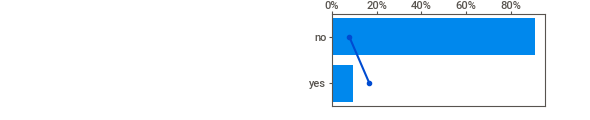
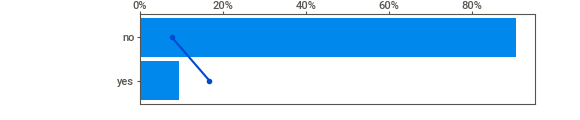
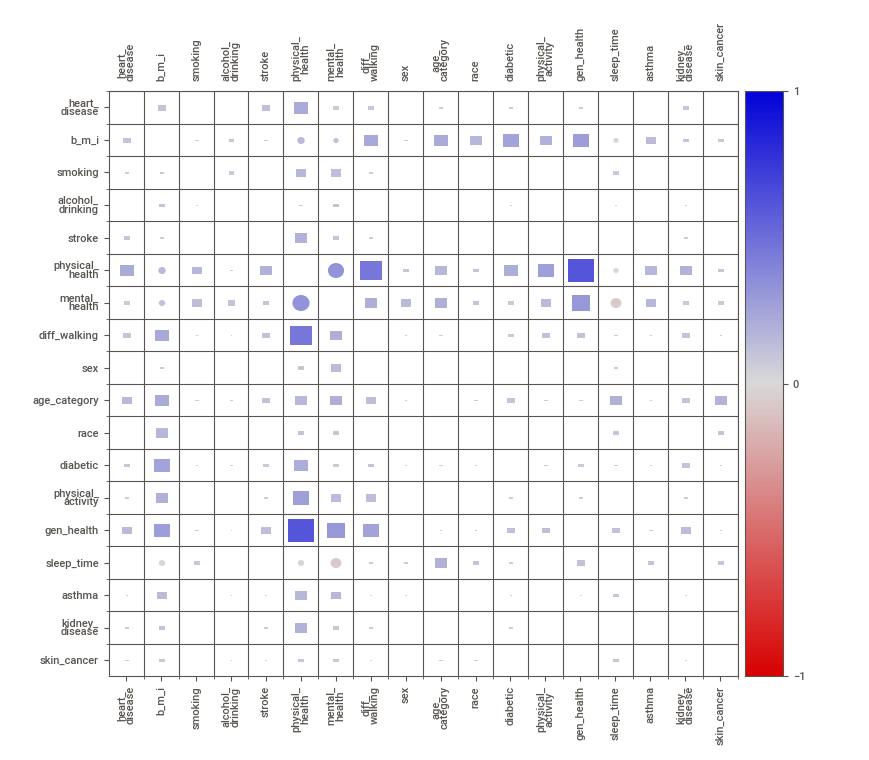
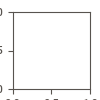

In [12]:
# analyzing the dataset using sweetviz
eda_viz = sv.analyze(df, target_feat='heart_disease')

# to automaticaly display the report
eda_viz.show_notebook(layout='vertical', w=800, h=700, scale=0.8)

In [13]:
# target variable
df['heart_disease'].value_counts(normalize=True).round(2)

no     0.91
yes    0.09
Name: heart_disease, dtype: float64

The target variable "heart_disease" reveals a significant class imbalance within the dataset, 
with a notable discrepancy between positive and negative class values:
* Positive class accounts for only 9% of the dataset.
* Negative class dominates the dataset, representing 91% of the data.

In [14]:
# number of duplicates 
df[df.duplicated(keep='first')].shape[0]

18078

In [15]:
# We can create dataframe containing the index of of the duplicated rows and their values, in order to check their values.
df_dups = df[df.duplicated(keep=False)]

In [16]:
df_dups.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
24,no,25.75,no,no,no,0.0,0.0,no,female,80 or older,white,no,yes,very good,6.0,no,no,yes
41,no,28.13,no,no,no,0.0,0.0,no,male,60-64,white,no,yes,excellent,8.0,no,no,no
46,no,33.23,no,no,no,0.0,0.0,no,male,65-69,white,yes,yes,very good,8.0,no,no,no
102,no,23.49,no,no,no,0.0,0.0,no,female,70-74,white,no,yes,very good,8.0,no,no,no
104,no,25.09,yes,no,no,0.0,0.0,no,male,65-69,white,no,yes,very good,7.0,no,no,no


In [17]:
# create a tuple containing the indexes of duplicated rows groupby all columns
df_dups_index = df_dups.groupby(list(df_dups)).apply(lambda x: tuple(x.index)).tolist()
df_dups_index[:10]

[(186950, 187048, 188282, 188328),
 (75493, 104851),
 (20332, 230319),
 (154193, 168816),
 (21542, 215928),
 (101319, 294295),
 (145663, 164383),
 (140819, 228228),
 (96504, 254600),
 (186337, 258425)]

In [18]:
#  create a tuple containing the indexes of duplicated rows groupby all columns and show the values
df_dups_index_values = (df_dups.groupby(df_dups.columns.tolist())
       .apply(lambda x: tuple(x.index))
       .reset_index(name='idx'))

df_dups_index_values.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer,idx
0,no,15.43,no,no,no,0.0,0.0,yes,male,35-39,american indian/alaskan native,no,yes,good,8.0,yes,no,no,"(186950, 187048, 188282, 188328)"
1,no,16.24,yes,no,no,2.0,10.0,no,male,18-24,white,no,yes,good,5.0,no,no,no,"(75493, 104851)"
2,no,16.64,no,no,no,0.0,0.0,no,female,80 or older,white,no,yes,very good,8.0,no,no,no,"(20332, 230319)"
3,no,16.82,yes,no,no,0.0,0.0,no,female,65-69,white,no,no,good,6.0,no,no,no,"(154193, 168816)"
4,no,17.22,no,no,no,0.0,0.0,no,male,18-24,hispanic,no,yes,excellent,8.0,no,no,no,"(21542, 215928)"


In [19]:
# dropping duplicates
df.drop_duplicates(keep='first', inplace=True)

In [20]:
# new dimensions of the dataset
dataset_dimensions(df)

Dimensions of the dataset:
 Number of rows:    301717
 Number of columns: 18



In [21]:
df.heart_disease.value_counts(normalize=True).round(2)

no     0.91
yes    0.09
Name: heart_disease, dtype: float64

In [22]:
# save the dataset
df.to_csv('../data/heart_2020_cleaned_no-duplicates.csv', index=False)

## Data Preprocessing

In Data Preprocessing step we have to make the data machine learnable.
* some column have their values converted to integer 
* categorical nominal variables containing yes/no are replaced by 1/0 values
* categorical ordinal variables are replaced by a sequence of integers starting with zero (see below tables)


|gen_health|gen_health (ordinal)|
|:--------:|:------------:|
|poor      |0             |
|fair      |1             |
|good      |2             |
|very good |3             |
|excellent |4             |


|age_category|age_category (ordinal)|
|:---------:|:-:|
|18-24      |0|
|25-29      |1|
|30-34      |2|
|35-39      |3|
|40-44      |4|
|45-49      |5|
|50-54      |6|
|55-59      |7|
|60-64      |8|
|65-69      |9|
|70-74      |10|
|75-79      |11|
|80 or older|12|




> NOTE: One-hot encoding to variable as `sex`,`race` and `diabetic` will be applied after the train/test split.

In [23]:
df = pd.read_csv('data/heart_2020_cleaned_no-duplicates.csv')

In [24]:
df.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,no,16.60,yes,no,no,3.0,30.0,no,female,55-59,white,yes,yes,very good,5.0,yes,no,yes
1,no,20.34,no,no,yes,0.0,0.0,no,female,80 or older,white,no,yes,very good,7.0,no,no,no
2,no,26.58,yes,no,no,20.0,30.0,no,male,65-69,white,yes,yes,fair,8.0,yes,no,no
3,no,24.21,no,no,no,0.0,0.0,no,female,75-79,white,no,no,good,6.0,no,no,yes
4,no,23.71,no,no,no,28.0,0.0,yes,female,40-44,white,no,yes,very good,8.0,no,no,no


In [25]:
# converting column values to integer
df['physical_health'] = df['physical_health'].astype(int)
df['mental_health'] = df['mental_health'].astype(int)
df['sleep_time'] = df['sleep_time'].astype(int)

In [26]:
# replace column values yes/no with 1/0
columns_yes_no = [
    'heart_disease',
    'smoking',
    'alcohol_drinking',
    'stroke',
    'diff_walking',
    'physical_activity',
    'asthma',
    'kidney_disease',
    'skin_cancer'
]

for column in columns_yes_no:
    df[column] = df[column].replace(['yes', 'no'], [1, 0])

In [27]:
df.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3,30,0,female,55-59,white,yes,1,very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,female,80 or older,white,no,1,very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,male,65-69,white,yes,1,fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,female,75-79,white,no,0,good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,female,40-44,white,no,1,very good,8,0,0,0


In [28]:
# Replacing ordinal variables by a sequence of integers
df['gen_health'] = df['gen_health'].replace(['poor', 'fair', 'good', 'very good', 'excellent'], [0, 1, 2, 3, 4])

df['age_category'] = (df['age_category']
                      .replace(
                          [
                              '18-24', 
                              '25-29', 
                              '30-34', 
                              '35-39', 
                              '40-44', 
                              '45-49', 
                              '50-54', 
                              '55-59', 
                              '60-64', 
                              '65-69',  
                              '70-74', 
                              '75-79',  
                              '80 or older'
                          ], 
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                      )
                     )

In [29]:
df.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3,30,0,female,7,white,yes,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,female,12,white,no,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,male,9,white,yes,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,female,11,white,no,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,female,4,white,no,1,3,8,0,0,0


In [30]:
# Feature importance analysis
global_heart_disease = df.heart_disease.mean()
global_heart_disease

0.0903528803481408

In [31]:
categorical = [
    'smoking',
    'alcohol_drinking',
    'stroke',
    'physical_health',
    'mental_health',
    'diff_walking',
    'sex',
    'age_category',
    'race',
    'diabetic',
    'physical_activity',
    'gen_health',
    'sleep_time',
    'asthma',
    'kidney_disease',
    'skin_cancer'
]

In [32]:
for feature in categorical:
    df_group = df.groupby(feature).heart_disease.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heart_disease
    df_group['risk'] = df_group['mean'] / global_heart_disease
    display(df_group)
    print()
    print()

,mean,count,diff,risk
smoking,,,,
0,0.064734,174312,-0.025618,0.716463
1,0.125403,127405,0.035050,1.387927


,mean,count,diff,risk
alcohol_drinking,,,,
0,0.093240,280136,0.002888,1.031959
1,0.052871,21581,-0.037482,0.585157


,mean,count,diff,risk
stroke,,,,
0,0.078963,289653,-0.011389,0.873945
1,0.363810,12064,0.273457,4.026542


,mean,count,diff,risk
physical_health,,,,
0,0.068597,208611,-0.021756,0.759207
1,0.057845,10459,-0.032508,0.640211
2,0.078742,14846,-0.011611,0.871491
3,0.097932,8608,0.007579,1.083885
4,0.110589,4467,0.020236,1.223965
5,0.118050,7590,0.027697,1.306545
6,0.136220,1270,0.045868,1.507649
7,0.100454,4629,0.010101,1.111793
8,0.129870,924,0.039517,1.437366


,mean,count,diff,risk
mental_health,,,,
0,0.096345,187898,0.005992,1.066317
1,0.066378,9235,-0.023975,0.734652
2,0.063830,16309,-0.026523,0.706450
3,0.063196,10412,-0.027157,0.699439
4,0.060216,5364,-0.030137,0.666456
5,0.062982,14004,-0.027371,0.697067
6,0.074172,1510,-0.016181,0.820917
7,0.057650,5516,-0.032702,0.638059
8,0.064899,1094,-0.025453,0.718289


,mean,count,diff,risk
diff_walking,,,,
0,0.066976,257362,-0.023377,0.741268
1,0.225995,44355,0.135642,2.501246


,mean,count,diff,risk
sex,,,,
female,0.070226,159671,-0.020127,0.777238
male,0.112977,142046,0.022625,1.250403


,mean,count,diff,risk
age_category,,,,
0,0.006501,19998,-0.083852,0.071947
1,0.008154,16312,-0.082199,0.090241
2,0.012588,17953,-0.077764,0.139325
3,0.015159,19526,-0.075194,0.167779
4,0.024500,19837,-0.065853,0.271155
5,0.036212,20518,-0.054141,0.400785
6,0.058266,23736,-0.032087,0.644871
7,0.079645,27610,-0.010708,0.881489
8,0.106378,31219,0.016025,1.177356


,mean,count,diff,risk
race,,,,
american indian/alaskan native,0.104391,5192,0.014038,1.155374
asian,0.033279,7993,-0.057074,0.368324
black,0.075800,22810,-0.014553,0.838934
hispanic,0.053233,27107,-0.037119,0.589173
other,0.081352,10891,-0.009001,0.900376
white,0.098343,227724,0.007990,1.088429


,mean,count,diff,risk
diabetic,,,,
no,0.069167,251796,-0.021186,0.765522
"no, borderline diabetes",0.116440,6776,0.026087,1.288729
yes,0.220454,40589,0.130101,2.439920
yes (during pregnancy),0.042254,2556,-0.048099,0.467650


,mean,count,diff,risk
physical_activity,,,,
0,0.138588,71305,0.048235,1.533850
1,0.075426,230412,-0.014927,0.834791


,mean,count,diff,risk
gen_health,,,,
0,0.341131,11286,0.250778,3.775537
1,0.204363,34659,0.114010,2.261826
2,0.104177,91239,0.013824,1.153001
3,0.050842,104796,-0.039511,0.562701
4,0.025026,59737,-0.065327,0.276985


,mean,count,diff,risk
sleep_time,,,,
1,0.108893,551,0.018540,1.205196
2,0.162437,788,0.072084,1.797802
3,0.174197,1992,0.083844,1.927961
4,0.152652,7730,0.062299,1.689509
5,0.106277,19101,0.015924,1.176245
6,0.083752,64655,-0.006601,0.926946
7,0.070244,89445,-0.020109,0.777444
8,0.092027,90202,0.001674,1.018526
9,0.106920,15853,0.016567,1.183358


,mean,count,diff,risk
asthma,,,,
0,0.086190,259066,-0.004162,0.953931
1,0.115636,42651,0.025283,1.279829


,mean,count,diff,risk
kidney_disease,,,,
0,0.082110,289941,-0.008243,0.908768
1,0.293308,11776,0.202956,3.246254


,mean,count,diff,risk
skin_cancer,,,,
0,0.081832,272425,-0.008521,0.905690
1,0.169603,29292,0.079250,1.877114


In [33]:
# Mutual Information
def mutual_info_score_heart_disease(series):
    return mutual_info_score(series, df.heart_disease)

In [34]:
mi = df[categorical].apply(mutual_info_score_heart_disease)
mi.sort_values(ascending=False)

age_category         0.033523
gen_health           0.027151
diff_walking         0.015175
diabetic             0.012960
stroke               0.011955
physical_health      0.011333
kidney_disease       0.006925
smoking              0.005384
physical_activity    0.004011
skin_cancer          0.003431
sleep_time           0.002811
sex                  0.002771
race                 0.001976
mental_health        0.001800
alcohol_drinking     0.000756
asthma               0.000601
dtype: float64

In [35]:
# save the dataset
df.to_csv('../data/heart_2020_cleaned_preproc_ordinal.csv', index=False)

## Modeling

In [36]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    matthews_corrcoef,
    precision_score, 
    recall_score, 
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay, 
    confusion_matrix
)
from pandas import option_context

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance

# importing user defined funtions
#sys.path.append("../scripts")
from modeling import get_metrics, plot_cf_matrix, train_and_evaluate_models

In [37]:
# allow showing more rows and columns when using the method df.head()
pd.set_option("display.max_columns", 100)

## Data loading

In [38]:
df = pd.read_csv('data/heart_2020_cleaned_preproc_ordinal.csv')

In [39]:
df.head()

,heart_disease,b_m_i,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3,30,0,female,7,white,yes,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,female,12,white,no,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,male,9,white,yes,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,female,11,white,no,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,female,4,white,no,1,3,8,0,0,0


## Data splitting
The data will be splitted in three partitions (60% / 20% / 20%) corresponding to train, test and validation sets. Since the data is imbalanced the splitting will be done setting the parameter `stratify` that allows keeping the proportion of classes in the different partitions.

In [40]:
# separating features and target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# data splitting
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)

print(f'Train features shape       : {X_train.shape}')
print(f'Train target shape         : {y_train.shape}')
print(f'Validation features shape  : {X_val.shape}')
print(f'Validation target shape    : {y_val.shape}')
print(f'Test features shape        : {X_test.shape}')
print(f'Test target shape          : {y_test.shape}')

Train features shape       : (181029, 17)
Train target shape         : (181029,)
Validation features shape  : (60344, 17)
Validation target shape    : (60344,)
Test features shape        : (60344, 17)
Test target shape          : (60344,)


## One-hot encoding

Features:
* `diabetic`, `race`, `sex` 

In [41]:
# create a data dictionary of features

features = [
    'b_m_i',
    'smoking',
    'alcohol_drinking',
    'stroke',
    'physical_health',
    'mental_health',
    'diff_walking',
    'sex',
    'age_category',
    'race',
    'diabetic',
    'physical_activity',
    'gen_health',
    'sleep_time',
    'asthma',
    'kidney_disease',
    'skin_cancer'
]

train_dict = X_train[features].to_dict(orient='records')
val_dict = X_val[features].to_dict(orient='records')

# encode dictionary of features
dv = DictVectorizer(sparse=False)
X_train_dv = dv.fit_transform(train_dict)
X_val_dv = dv.transform(val_dict)

In [42]:
list(dv.get_feature_names_out())

['age_category',
 'alcohol_drinking',
 'asthma',
 'b_m_i',
 'diabetic=no',
 'diabetic=no, borderline diabetes',
 'diabetic=yes',
 'diabetic=yes (during pregnancy)',
 'diff_walking',
 'gen_health',
 'kidney_disease',
 'mental_health',
 'physical_activity',
 'physical_health',
 'race=american indian/alaskan native',
 'race=asian',
 'race=black',
 'race=hispanic',
 'race=other',
 'race=white',
 'sex=female',
 'sex=male',
 'skin_cancer',
 'sleep_time',
 'smoking',
 'stroke']

## Model building: imbalanced data

In [43]:
# model definitions
models = [
        LogisticRegression(random_state=42, max_iter=1500),
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42, n_jobs=-1),
        XGBClassifier(random_state=42, n_jobs=-1),
    ]

model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "XGBoost",
]

------------------------------------------------------------------------------------------
                                   Score Table                                   
------------------------------------------------------------------------------------------
 Modeling Algorithm  Accuracy  F1 Score  Precision  Recall  Specificity  MCC  ROC/AUC
      Random Forest      0.90      0.18       0.35    0.12         0.98 0.16     0.55
            XGBoost      0.91      0.18       0.54    0.11         0.99 0.21     0.55
Logistic Regression      0.91      0.19       0.54    0.11         0.99 0.22     0.55
      Decision Tree      0.85      0.24       0.23    0.25         0.91 0.16     0.58
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.



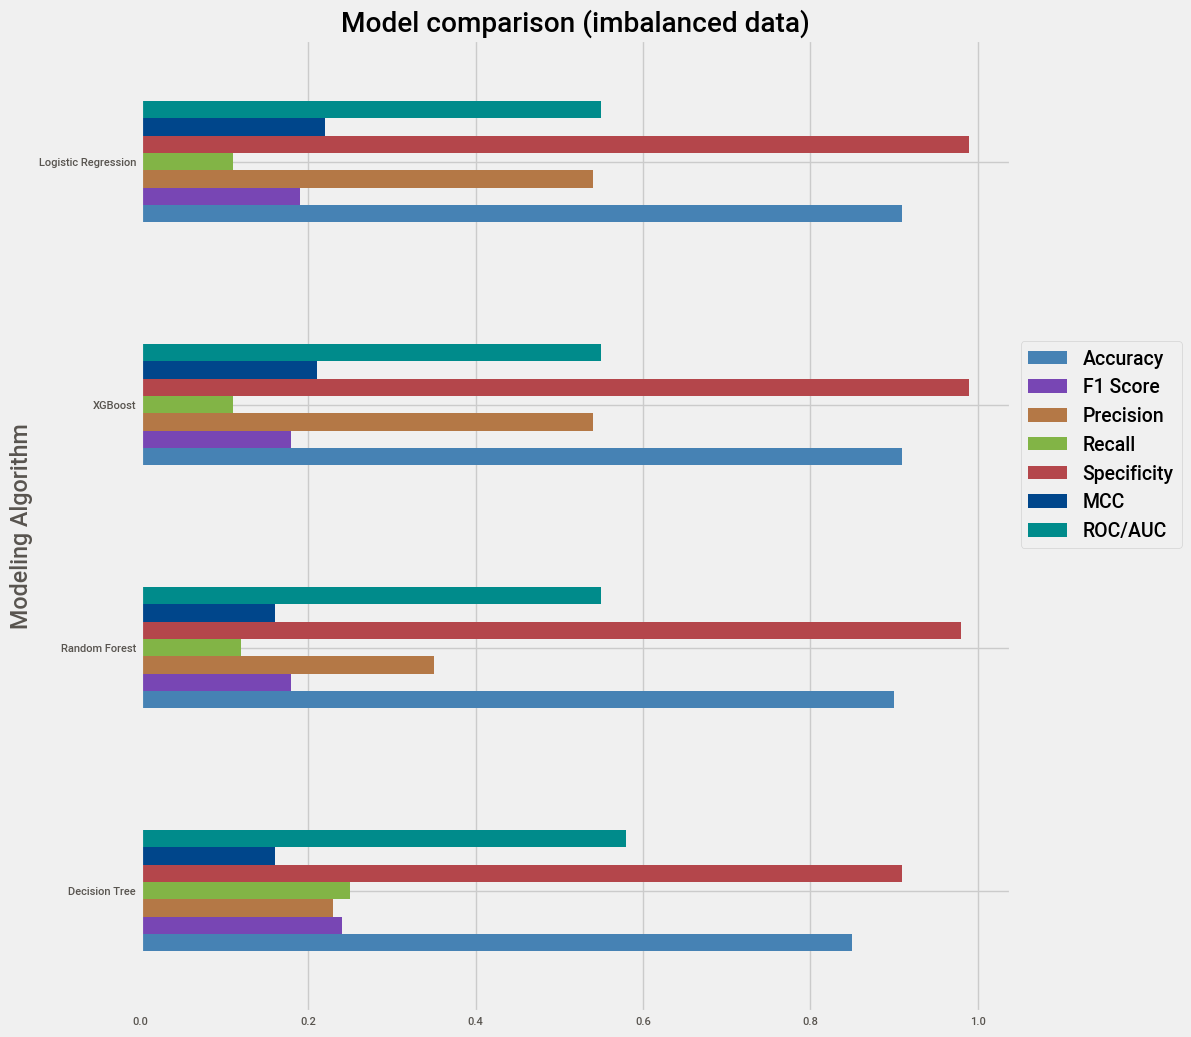

In [44]:
# training and evaluating the models
train_and_evaluate_models(
    X_train_dv, y_train, X_val_dv, y_val, 
    models=models,
    model_names=model_names,
    plot_title="Model comparison (imbalanced data)")

## Model building: handling class imbalance with class weight

In [45]:
# xgboost
negative_examples = y_train.value_counts()[0]
positive_examples = y_train.value_counts()[1]

scale_pos_weight = negative_examples/positive_examples
scale_pos_weight

10.067371767439017

In [46]:
# model definitions

models = [
    LogisticRegression(class_weight='balanced', random_state=42, max_iter=1500),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, n_jobs=-1),
]

model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "XGBoost",
]

------------------------------------------------------------------------------------------
                                   Score Table                                   
------------------------------------------------------------------------------------------
 Modeling Algorithm  Accuracy  F1 Score  Precision  Recall  Specificity  MCC  ROC/AUC
      Random Forest      0.90      0.16       0.34    0.11         0.98 0.15     0.54
      Decision Tree      0.86      0.22       0.22    0.21         0.92 0.14     0.57
Logistic Regression      0.74      0.35       0.23    0.78         0.74 0.32     0.76
            XGBoost      0.74      0.35       0.23    0.75         0.74 0.31     0.75
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.



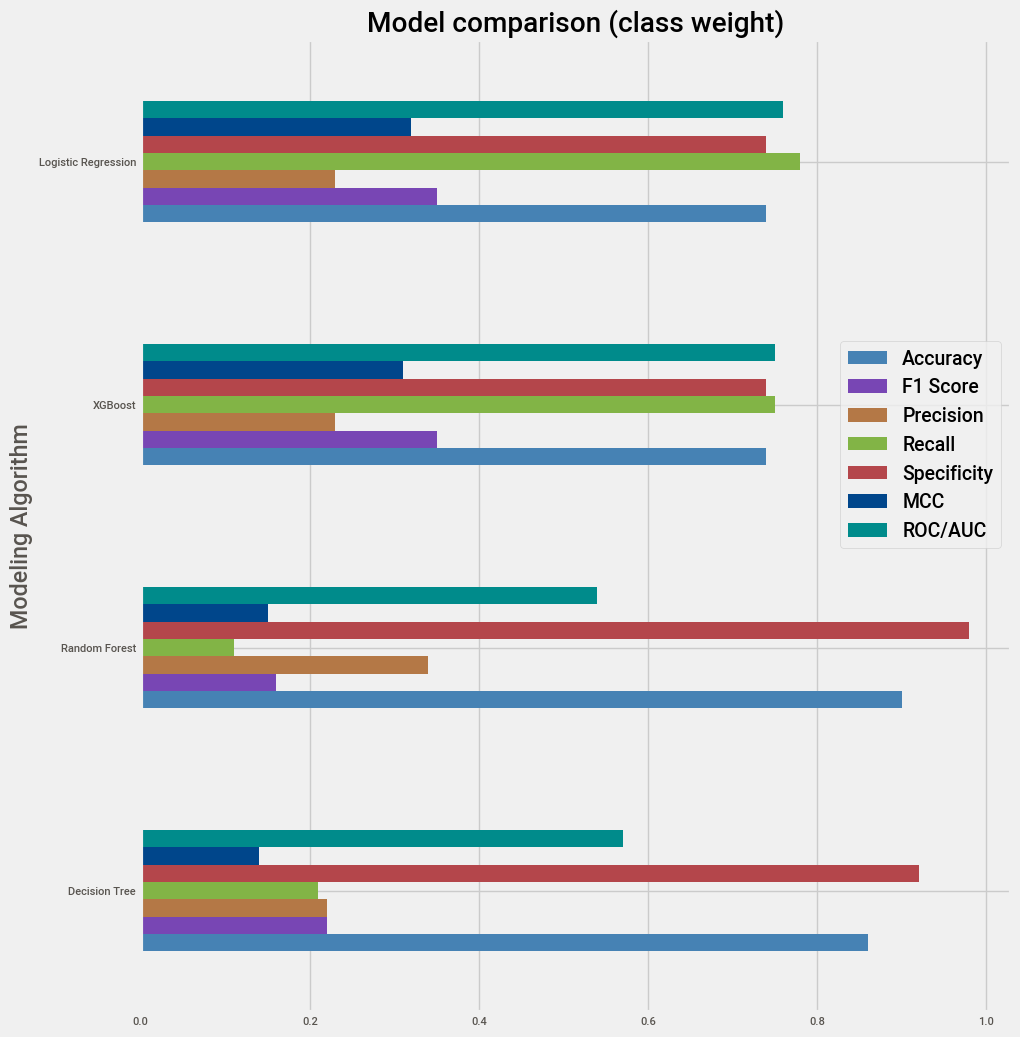

In [47]:
# training and evaluating the models
train_and_evaluate_models(
    X_train_dv, y_train, X_val_dv, y_val, 
    models=models,
    model_names=model_names,
    plot_title="Model comparison (class weight)")


* In general, handling class imbalance with class weights improved models performance. Other techniques as oversampling and/or undersampling could be also applied to tackle this problem but we won't do this here. 
* Since we have an imbalanced classification problem the most useful metrics are F1 ,recall and MCC. The Matthews correlation coefficient (MCC) is a common metrics in imbalanced and medical problems.
* The best results were obtained for LogisticRegression and XGBoost.Their results are repeated below.
* XGBoost is the chosen method for tuning.

## Logistic regression

In [48]:
model_lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1500)
model_lr.fit(X_train_dv, y_train)
y_pred_lr = model_lr.predict(X_val_dv)

get_metrics(y_pred_lr, y_val)

-------------------------
         METRICS         
-------------------------
Accuracy       =   0.7432
F1 Score       =   0.3546
MCC            =   0.3233
Precision      =   0.2294
Recall         =   0.781 
ROC/AUC        =   0.7602
Specificity    =   0.7394
-.-.-.-.-.-.-.-.-.-.-.-.


In [49]:
confusion_matrix(y_val, y_pred_lr, normalize='true')

array([[0.73939736, 0.26060264],
       [0.2190022 , 0.7809978 ]])

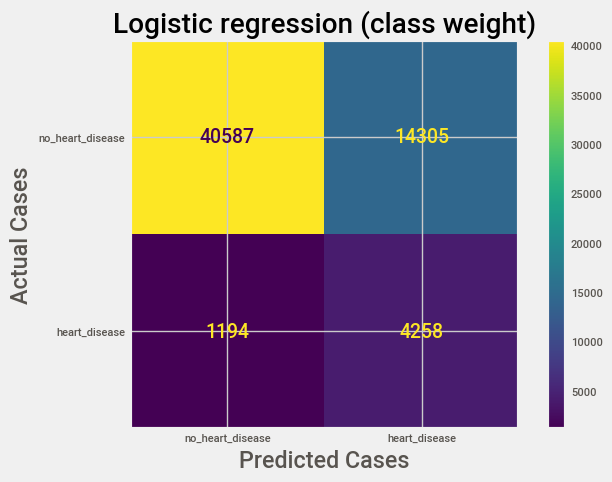

In [50]:
plot_cf_matrix(y_pred_lr, y_val, 'Logistic regression (class weight)')

## XGBoost

In [51]:
model_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, n_jobs=-1)
model_xgb.fit(X_train_dv, y_train)
y_pred_xgb = model_xgb.predict(X_val_dv)

get_metrics(y_pred_xgb, y_val)

-------------------------
         METRICS         
-------------------------
Accuracy       =   0.7446
F1 Score       =   0.3481
MCC            =   0.3114
Precision      =   0.2262
Recall         =   0.755 
ROC/AUC        =   0.7492
Specificity    =   0.7435
-.-.-.-.-.-.-.-.-.-.-.-.


In [52]:
confusion_matrix(y_val, y_pred_xgb, normalize='true')

array([[0.74353276, 0.25646724],
       [0.24504769, 0.75495231]])

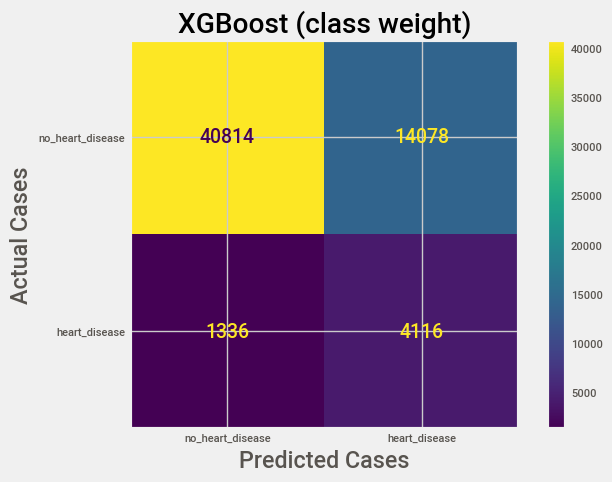

In [53]:
plot_cf_matrix(y_pred_xgb, y_val, 'XGBoost (class weight)')

## ROC-AUC (Logistic Regression and XGBoost)

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.834
XGBoost: ROC AUC=0.826


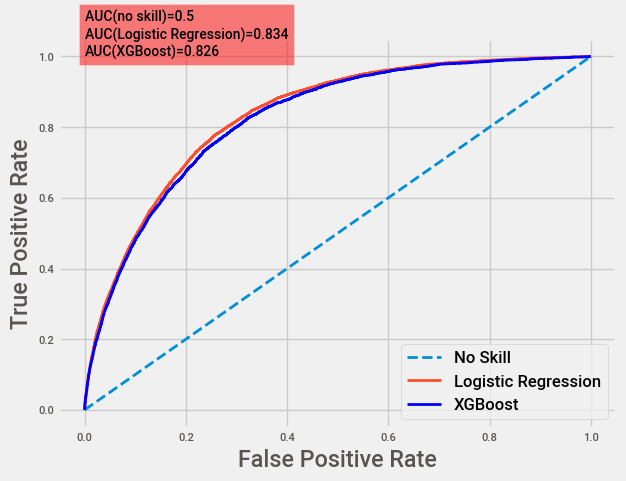

In [54]:
#fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]
# predict probabilities
lr_probs = model_lr.predict_proba(X_val_dv)
xgb_probs = model_xgb.predict_proba(X_val_dv)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# lr_thres = roc_auc_score(y_val, y_pred)
xgb_auc = roc_auc_score(y_val, xgb_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# print('Logistic Regression Thresholded: ROC AUC=%.3f' % (lr_thres))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_val, xgb_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', linewidth=2, label='No Skill')
plt.plot(lr_fpr, lr_tpr, linewidth=2, label='Logistic Regression')
plt.plot(xgb_fpr, xgb_tpr, linewidth=2, label='XGBoost', color='b')
# plt.plot(fpr, tpr, linewidth=2, marker='o', label='Logistic Regression Thresholded')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0, 1, f'AUC(no skill)={ns_auc}\nAUC(Logistic Regression)={round(lr_auc, 3)}\nAUC(XGBoost)={round(xgb_auc, 3)}', fontsize=10, bbox=dict(facecolor='red', alpha=0.5))
# show the legend
plt.legend(fontsize=12)
# show the plot
plt.show()

# Hyperparameter tuning

## Logistic Regression

In [55]:
%%time

params = {
    'solver':['lbfgs', 'liblinear', 'sag', 'saga'],
    'C':[150, 100, 10, 1.0, 0.1, 0.01],
    #'penalty':['l2']
    #'penalty':['l1', 'l2', 'elasticnet']
}

# prepare the cross-validation procedure
kfold = StratifiedKFold(n_splits=5)

# create model
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1500)
search = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=kfold, n_jobs=-1, verbose=True)
search.fit(X_train_dv, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 8.27 s
Wall time: 31min 21s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1500, random_state=42),
             n_jobs=-1,
             param_grid={'C': [150, 100, 10, 1.0, 0.1, 0.01],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='f1', verbose=True)

In [56]:
search.best_params_

{'C': 10, 'solver': 'sag'}

In [57]:
results = pd.DataFrame(search.cv_results_)
results = results.sort_values(by=["rank_test_score"])
results = results.set_index(
    results["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("booster")
# results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
with option_context('display.max_colwidth', 400):
    display(results[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

,params,rank_test_score,mean_test_score,std_test_score
booster,,,,
10_sag,"{'C': 10, 'solver': 'sag'}",1,0.355319,0.003506
100_liblinear,"{'C': 100, 'solver': 'liblinear'}",2,0.355314,0.003510
150_liblinear,"{'C': 150, 'solver': 'liblinear'}",3,0.355314,0.003498
10_liblinear,"{'C': 10, 'solver': 'liblinear'}",4,0.355314,0.003493
100_lbfgs,"{'C': 100, 'solver': 'lbfgs'}",5,0.355305,0.003436
1.0_saga,"{'C': 1.0, 'solver': 'saga'}",6,0.355304,0.003482
1.0_sag,"{'C': 1.0, 'solver': 'sag'}",7,0.355299,0.003487
10_saga,"{'C': 10, 'solver': 'saga'}",8,0.355291,0.003525
150_sag,"{'C': 150, 'solver': 'sag'}",8,0.355291,0.003525


In [58]:
model_lr = LogisticRegression(solver='lbfgs', C=1, penalty='l2', class_weight='balanced', random_state=42, max_iter=1500)
model_lr.fit(X_train_dv, y_train)
y_pred = model_lr.predict(X_val_dv)

get_metrics(y_pred, y_val)

-------------------------
         METRICS         
-------------------------
Accuracy       =   0.7432
F1 Score       =   0.3546
MCC            =   0.3233
Precision      =   0.2294
Recall         =   0.781 
ROC/AUC        =   0.7602
Specificity    =   0.7394
-.-.-.-.-.-.-.-.-.-.-.-.


## XGBoost

In [59]:
params = {
    'objective': ['binary:logistic'],
    'eval_metric': ['auc'],
    'learning_rate': [0.001, 0.005, 0.006, 0.007, 0.008, 0.01, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [6, 7, 8, 9, 10],
    'n_jobs': [-1],
    'num_parallel_tree': [None],
    'random_state': [42],
    'scale_pos_weight': [10.07],
    'subsample': [None],
    'verbosity': [1]
}

In [60]:
%%time

# prepare the cross-validation procedure
kfold = StratifiedKFold(n_splits=5)

# create model
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, n_jobs=-1)

search = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=kfold, n_jobs=-1)
search.fit(X_train_dv, y_train)

CPU times: total: 12.6 s
Wall time: 11min 21s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'eval_metric': ['auc'],
                         'learning_rate': [0.001, 0.005, 0.006, 0.007, 0.008,
                                           0.01, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [6, 7, 8, 9, 10], 'n_jobs': [-1],
                         'num_parallel_tree': [None],
                         'objective': ['binary:logistic'], 'random_state': [42],
                         'scale_pos_weight': [10.07], 'subsample': [None],
                         'verbosity': [1]},
             scoring='roc_auc')

In [61]:
search.best_params_

{'eval_metric': 'auc',
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 9,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'scale_pos_weight': 10.07,
 'subsample': None,
 'verbosity': 1}

In [62]:
results = pd.DataFrame(search.cv_results_)
results = results.sort_values(by=["rank_test_score"])
results = results.set_index(
    results["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("booster")
# results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
with option_context('display.max_colwidth', 400):
    display(results[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

,params,rank_test_score,mean_test_score,std_test_score
booster,,,,
auc_0.1_4_9_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 9, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",1,0.840105,0.002942
auc_0.1_4_10_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",2,0.840066,0.002878
auc_0.1_4_6_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",3,0.840010,0.002958
auc_0.1_4_8_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 8, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",4,0.839977,0.003011
auc_0.1_4_7_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 7, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",5,0.839870,0.003035
...,...,...,...,...
auc_0.001_3_10_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 10, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",136,0.790625,0.005724
auc_0.001_3_9_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 9, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",136,0.790625,0.005724
auc_0.001_3_8_-1_None_binary:logistic_42_10.07_None_1,"{'eval_metric': 'auc', 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 8, 'n_jobs': -1, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 10.07, 'subsample': None, 'verbosity': 1}",136,0.790625,0.005724


In [63]:
model_xgb = XGBClassifier(scale_pos_weight=10.07, learning_rate=0.1, max_depth=4, min_child_weight=6, objective='binary:logistic', verbosity=1, random_state=42, n_jobs=-1)
model_xgb.fit(X_train_dv, y_train)
y_pred = model_xgb.predict(X_val_dv)

get_metrics(y_pred, y_val)

-------------------------
         METRICS         
-------------------------
Accuracy       =   0.7253
F1 Score       =   0.3462
MCC            =   0.3186
Precision      =   0.2205
Recall         =   0.8052
ROC/AUC        =   0.7613
Specificity    =   0.7173
-.-.-.-.-.-.-.-.-.-.-.-.


In [64]:
confusion_matrix(y_val, y_pred, normalize='true')

array([[0.71731764, 0.28268236],
       [0.1947909 , 0.8052091 ]])

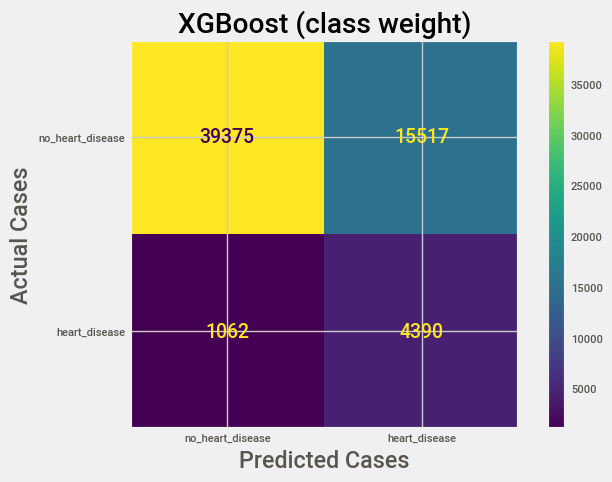

In [65]:
plot_cf_matrix(y_pred, y_val, 'XGBoost (class weight)')

* Tuning Logist Regression did not improve the model.
* Tuning XGBoost lead to a small increase in recall.

In [66]:
feature_names = list(dv.get_feature_names_out())

In [67]:
def plot_feature_importances(model, df, title, feature_names, plt):
    n_features = df.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.tick_params(labelsize='small')
    plt.xlabel("Feature importance", labelpad=20)
    plt.ylabel("Feature", labelpad=20)
    plt.title(title)

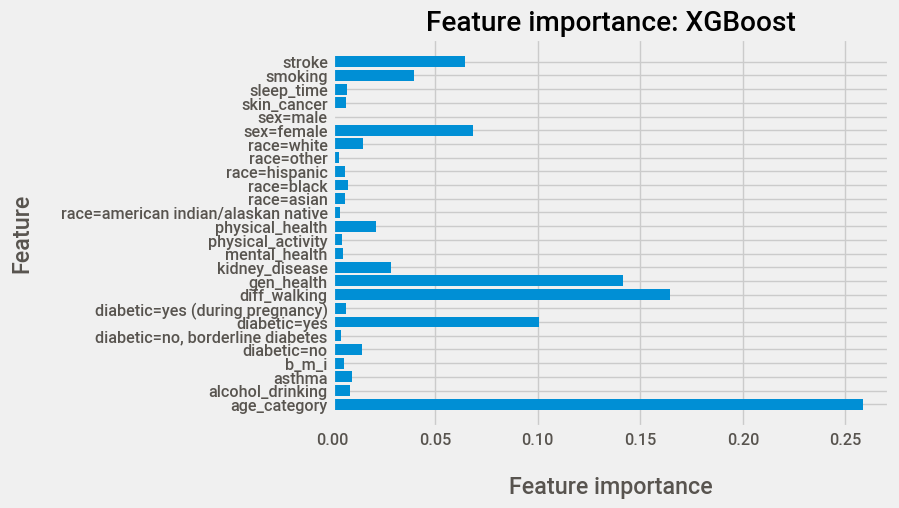

In [68]:
plot_feature_importances(model_xgb, X_train_dv, 'Feature importance: XGBoost', feature_names, plt)

In [69]:
test_dict = X_test[features].to_dict(orient='records')

# encode dictionary of features
X_test_dv = dv.transform(test_dict)

In [70]:
y_pred = model_xgb.predict(X_test_dv)

get_metrics(y_pred, y_test)

-------------------------
         METRICS         
-------------------------
Accuracy       =   0.7269
F1 Score       =   0.3465
MCC            =   0.3182
Precision      =   0.221 
Recall         =   0.8014
ROC/AUC        =   0.7604
Specificity    =   0.7195
-.-.-.-.-.-.-.-.-.-.-.-.


## Saving model using pickle 

In [71]:
output_file = 'heart_disease_model.bin'

In [72]:
output_file

'heart_disease_model.bin'

In [73]:
import pickle

In [75]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model_xgb), f_out)
f_out.close()

In [76]:
!ls -lh *.bin

-rw-r--r-- 1 Fozan 197121 171K Nov  5 21:48 heart_disease_model.bin


In [80]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model_xgb), f_out)

In [81]:
input_file = 'heart_disease_model.bin'

In [82]:
with open(input_file, 'rb') as f_in: 
    dv, model_xgb = pickle.load(f_in)

In [83]:
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

## Test

In [84]:
import json

In [85]:
request = X_test.iloc[0].to_dict()
print(json.dumps(request, indent=2))

{
  "b_m_i": 25.86,
  "smoking": 1,
  "alcohol_drinking": 0,
  "stroke": 0,
  "physical_health": 0,
  "mental_health": 0,
  "diff_walking": 0,
  "sex": "female",
  "age_category": 11,
  "race": "white",
  "diabetic": "no",
  "physical_activity": 1,
  "gen_health": 3,
  "sleep_time": 7,
  "asthma": 1,
  "kidney_disease": 0,
  "skin_cancer": 0
}


In [86]:
request = X_test.iloc[10].to_dict()
print(json.dumps(request, indent=2))

{
  "b_m_i": 23.63,
  "smoking": 1,
  "alcohol_drinking": 0,
  "stroke": 1,
  "physical_health": 0,
  "mental_health": 15,
  "diff_walking": 0,
  "sex": "female",
  "age_category": 11,
  "race": "other",
  "diabetic": "no",
  "physical_activity": 1,
  "gen_health": 3,
  "sleep_time": 8,
  "asthma": 0,
  "kidney_disease": 1,
  "skin_cancer": 1
}
